# Learning matplotlib

The purpose of this notebook is to learn how to do matplotlib graphs.

In [1]:
import pandas as pd
from numpy.polynomial import polynomial as nppoly
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
from matplotlib.dates import DateFormatter, DayLocator
from matplotlib.ticker import NullFormatter, NullLocator

%matplotlib inline
%config InlineBackend.figure_format ='svg'

In [2]:
c = cm.Paired.colors

In [3]:
def despine(ax: axes.Axes) -> None:
    '''
    Remove the top and right spines of a graph.

    There is only one x axis, on the bottom, and one y axis, on the left.
    '''
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

In [4]:
pd.plotting.register_matplotlib_converters(explicit=True)

In [5]:
# df = pd.read_csv('weight.csv', parse_dates=['Date'], index_col='Date')
df = pd.read_csv('weight.csv', parse_dates=['Date'])

In [6]:
df.head()

,Date,Target,Actual,Steps
0,2019-11-15,85.40,85.4,4810.0
1,2019-11-16,85.33,NaN,8992.0
2,2019-11-17,85.26,83.1,2884.0
3,2019-11-18,85.19,NaN,6335.0
4,2019-11-19,85.12,NaN,6852.0


In [7]:
df.index

RangeIndex(start=0, stop=16, step=1)

In [8]:
df.dtypes

Date      datetime64[ns]
Target           float64
Actual           float64
Steps            float64
dtype: object

# Single figure, single axes

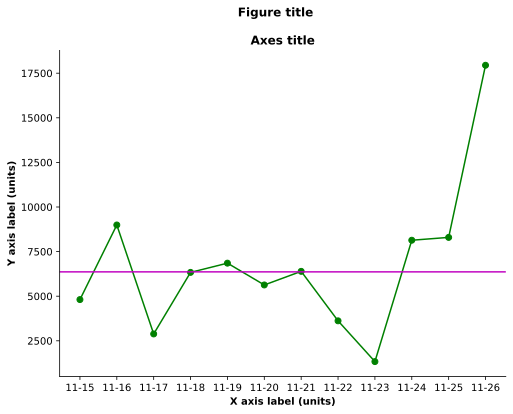

In [9]:
fighw = (8, 6)
fig_title = 'Figure title'
ax_title = 'Axes title'
x_axis_label = 'X axis label (units)'
y_axis_label = 'Y axis label (units)'
fig = plt.figure(figsize=fighw)
fig.suptitle(fig_title, fontweight='bold')
ax = fig.add_subplot(111)
ax.plot(df['Date'], df['Steps'],
        marker='o', linestyle='-', color='g')
ax.axhline(y=df['Steps'].median(), color='m')
ax.set_ylabel(y_axis_label, fontweight='bold')
ax.set_xlabel(x_axis_label, fontweight='bold')
ax.set_title(ax_title, fontweight='bold')
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(NullLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_minor_formatter(NullFormatter())
despine(ax)

## Single figure, single axes, left y axis, right y axis

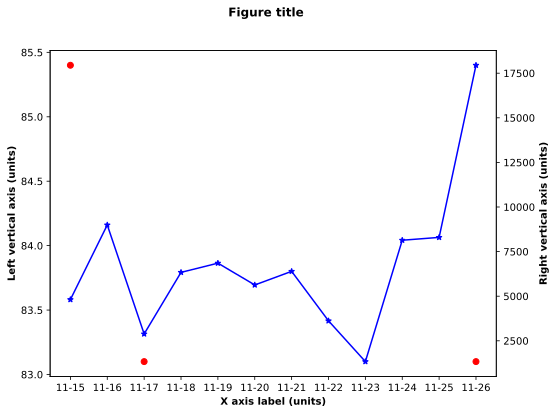

In [10]:
fighw = (8, 6)
fig_title = 'Figure title'
ax_title = 'Axes title'
x_axis_label = 'X axis label (units)'
y_axis_label = 'Y axis label (units)'
fig, ax1 = plt.subplots(figsize=(8, 6))
fig.suptitle(fig_title, fontweight='bold')
ax1.plot(df['Date'], df['Actual'],
         marker='o', linestyle='None', color='r')
# ax.autoscale(enable=True)
ax1.set_ylabel('Left vertical axis (units)', fontweight='bold')
ax1.set_xlabel(x_axis_label, fontweight='bold')
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Steps'],
         marker='*', linestyle='-', color='b')
ax2.set_ylabel('Right vertical axis (units)', fontweight='bold')
ax2.xaxis.set_major_locator(DayLocator())
ax2.xaxis.set_minor_locator(NullLocator())
ax2.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax2.xaxis.set_minor_formatter(NullFormatter())

## Single figure, two axes

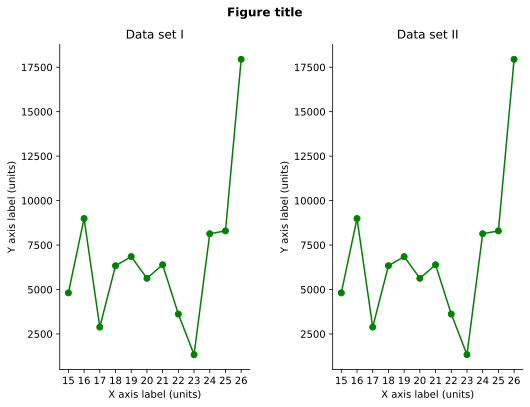

In [11]:
ax_title = [('Data set I', 'Data set II')]
fig = plt.figure(figsize=(fighw))
fig.suptitle(fig_title, fontweight='bold')
gs = GridSpec(1, 2, figure=fig)
for i in range(1):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.plot(df['Date'], df['Steps'],
                marker='o', linestyle='-', color='g')
        ax.set_title(ax_title[i][j])
        ax.set_ylabel(y_axis_label)
        ax.set_xlabel(x_axis_label)
        despine(ax)
        ax.xaxis.set_major_locator(DayLocator())
        ax.xaxis.set_minor_locator(NullLocator())
        ax.xaxis.set_major_formatter(DateFormatter('%d'))
        ax.xaxis.set_minor_formatter(NullFormatter())
plt.tight_layout(pad=3)

## Single figure, four axes

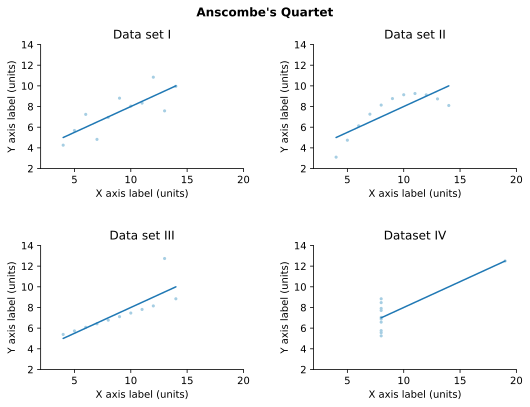

In [12]:
aq1 = pd.read_csv('aq1.csv')
aq2 = pd.read_csv('aq2.csv')
aq3 = pd.read_csv('aq3.csv')
aq4 = pd.read_csv('aq4.csv')
df = [(aq1, aq2), (aq3, aq4)]
xlim = [2, 20]
ylim = [2, 14]
fig_title = "Anscombe's Quartet"
ax_title = [('Data set I', 'Data set II'), ('Data set III', 'Dataset IV')]
fig = plt.figure(figsize=(fighw))
fig.suptitle(fig_title, fontweight='bold')
gs = GridSpec(2, 2, figure=fig)
for i in range(2):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.scatter(df[i][j]['x'], df[i][j]['y'], color=c[0], linewidth=0,
                   linestyle="-", s=10, label="I")
        b, m = nppoly.polyfit(df[i][j]['x'], df[i][j]['y'], 1)
        ax.plot(df[i][j]['x'], m*df[i][j]['x'] + b, '-', color=c[1])
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)
        ax.set_title(ax_title[i][j])
        ax.set_ylabel(y_axis_label)
        ax.set_xlabel(x_axis_label)
        despine(ax)
plt.tight_layout(pad=3)